## 0. Setting up Environment

### 0.1 Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tabulate import tabulate

### 0.2 Functions

In [3]:
# Prints small readable dataframes
def pprint_df(dframe):
    print(tabulate(dframe, headers='keys', tablefmt='psql', showindex=False))

# Standardizes strings for columns names
def scrub_colnames(string):
    return re.sub(r'[($)]', '', string.lower().replace(' ', '_')).rstrip("_")

## 1. Reading in Data

### 1.1 Reading Raw Data

In [8]:
dat_raw = pd.read_csv('Medicalpremium.csv')

### 1.2 Standardize Column Names

In [6]:
outcols = ['BloodPressureProblems',
           'AnyTransplants',
           'AnyChronicDiseases',
           'KnownAllergies',
           'HistoryOfCancerInFamily',
           'NumberOfMajorSurgeries',
           'PremiumPrice']

incols = ['Blood_Pressure_Problems',
          'Any_Transplants',
          'Any_Chronic_Diseases',
          'Known_Allergies',
          'History_Of_Cancer_In_Family',
          'Number_Of_Major_Surgeries',
          'Premium_Price']

# Replace all columns labels of outcols with incols
dat = dat_raw
for incol, outcol in zip(incols, outcols):
    dat[incol] = dat[outcol]
    dat = dat.drop(outcol, axis=1)
    
dat.columns = dat.columns.map(scrub_colnames)

## 1.3 Generate Descriptive Statistics for Features

In [7]:
desc = dat.describe()
desc

,age,diabetes,height,weight,blood_pressure_problems,any_transplants,any_chronic_diseases,known_allergies,history_of_cancer_in_family,number_of_major_surgeries,premium_price
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,168.182556,76.950304,0.468560,0.055781,0.180527,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,10.098155,14.265096,0.499264,0.229615,0.384821,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,168.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,176.000000,87.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,188.000000,132.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,40000.000000


## 2. Data Exploration

### 2.1 Continuous/Discrete Numerical Data

#### 2.1.1 Premium vs. Age

+--------------+-----------------+------------------+
| binned_age   |   premium_price |   premium_stddev |
|--------------+-----------------+------------------|
| <25          |         15867.6 |          3924.87 |
| 25-35        |         20721.2 |          5947.36 |
| 35-45        |         25330.1 |          4223.46 |
| 45-55        |         27676.1 |          3909.74 |
| 55+          |         28813.6 |          3470.26 |
+--------------+-----------------+------------------+


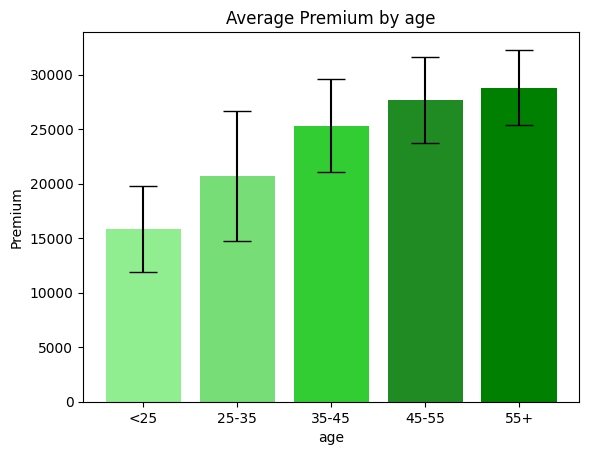

In [9]:
col = 'age'

bins = [0, 25, 35, 45, 55, 100]
labels = ['<25', '25-35', '35-45', '45-55', '55+']
dat[f'binned_{col}'] = pd.cut(dat[col], bins=bins, labels=labels, right=False)

bar = dat.groupby(f'binned_{col}', observed=True).mean().reset_index()
bar['premium_stddev'] = dat.groupby(f'binned_{col}', observed=True).std().reset_index()['premium_price']
pprint_df(bar[[f'binned_{col}', 'premium_price', 'premium_stddev']])

plt.bar(bar[f'binned_{col}'], bar['premium_price'], color=['#90EE90', '#77DD77', '#32CD32', '#208B22', '#008000'], yerr=bar['premium_stddev'], capsize=10)
plt.title(f'Average Premium by {col}')
plt.xlabel(col)
plt.ylabel('Premium')

dat = dat.drop(f'binned_{col}', axis=1)

#### 2.1.2 Premium vs. Height

+-----------------+-----------------+------------------+
| binned_height   |   premium_price |   premium_stddev |
|-----------------+-----------------+------------------|
| 0-25%           |         24592.3 |          6476.84 |
| 25-50%          |         23907.6 |          6013.33 |
| 50-75%          |         24097.6 |          6271.95 |
| 75-100%         |         24707.9 |          6249.58 |
+-----------------+-----------------+------------------+


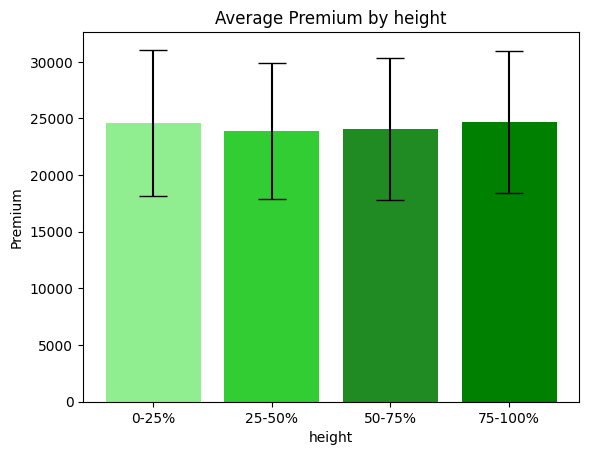

In [10]:
col = 'height'

bins = [0, desc[col]['25%'], desc[col]['50%'], desc[col]['75%'], desc[col]['max']]
labels = ['0-25%', '25-50%', '50-75%', '75-100%']
dat[f'binned_{col}'] = pd.cut(dat[col], bins=bins, labels=labels, right=False)


bar = dat.groupby(f'binned_{col}', observed=True).mean().reset_index()
bar['premium_stddev'] = dat.groupby(f'binned_{col}', observed=True).std().reset_index()['premium_price']
pprint_df(bar[[f'binned_{col}', 'premium_price', 'premium_stddev']])

plt.bar(bar[f'binned_{col}'], bar['premium_price'], color=['#90EE90', '#32CD32', '#208B22', '#008000'], yerr=bar['premium_stddev'], capsize=10)
plt.title(f'Average Premium by {col}')
plt.xlabel(col)
plt.ylabel('Premium')

dat = dat.drop(f'binned_{col}', axis=1)

#### 2.1.3 Premium vs. Weight

+-----------------+-----------------+------------------+
| binned_weight   |   premium_price |   premium_stddev |
|-----------------+-----------------+------------------|
| 0-25%           |         23397.4 |          5334.33 |
| 25-50%          |         24068.8 |          6132.62 |
| 50-75%          |         24107.6 |          6156    |
| 75-100%         |         25731.2 |          6981.19 |
+-----------------+-----------------+------------------+


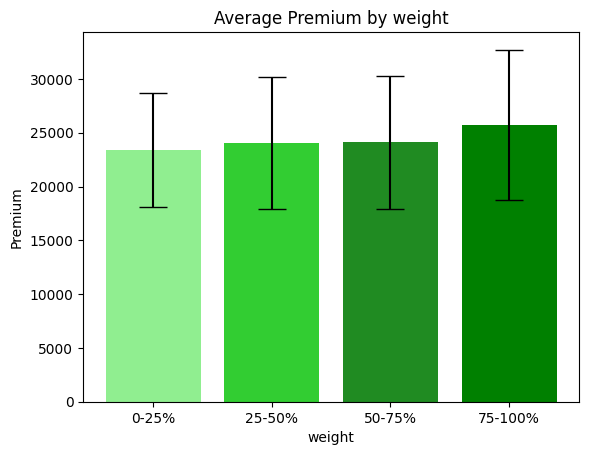

In [11]:
col = 'weight'

bins = [0, desc[col]['25%'], desc[col]['50%'], desc[col]['75%'], desc[col]['max']]
labels = ['0-25%', '25-50%', '50-75%', '75-100%']
dat[f'binned_{col}'] = pd.cut(dat[col], bins=bins, labels=labels, right=False)


bar = dat.groupby(f'binned_{col}', observed=True).mean().reset_index()
bar['premium_stddev'] = dat.groupby(f'binned_{col}', observed=True).std().reset_index()['premium_price']
pprint_df(bar[[f'binned_{col}', 'premium_price', 'premium_stddev']])

plt.bar(bar[f'binned_{col}'], bar['premium_price'], color=['#90EE90', '#32CD32', '#208B22', '#008000'], yerr=bar['premium_stddev'], capsize=10)
plt.title(f'Average Premium by {col}')
plt.xlabel(col)
plt.ylabel('Premium')

dat = dat.drop(f'binned_{col}', axis=1)

#### 2.1.4 Premium vs. Number of Surgeries

Text(0, 0.5, 'Premium')

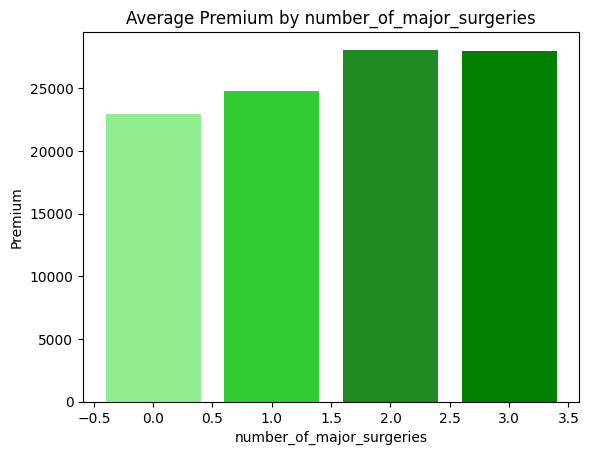

In [ ]:
col = 'number_of_major_surgeries'

bar = dat.groupby('number_of_major_surgeries', observed=True).mean().reset_index()

plt.bar(bar['number_of_major_surgeries'], bar['premium_price'], color=['#90EE90', '#32CD32', '#208B22', '#008000'])
plt.title(f'Average Premium by {col}')
plt.xlabel(col)
plt.ylabel('Premium')

### 2.2 Binary Variables
#### Diabetes:
##### We observe that subpopulation paying above the 50th percentile premium has greater instances of diabetes.
#### Blood Pressure Problems:
##### We generally observe higher instances of blood pressure problems in quartiles paying greater premiums.
#### Transplants:
##### Of the subpopulation with transplants, over half are paying within the top quartile of premium rates.

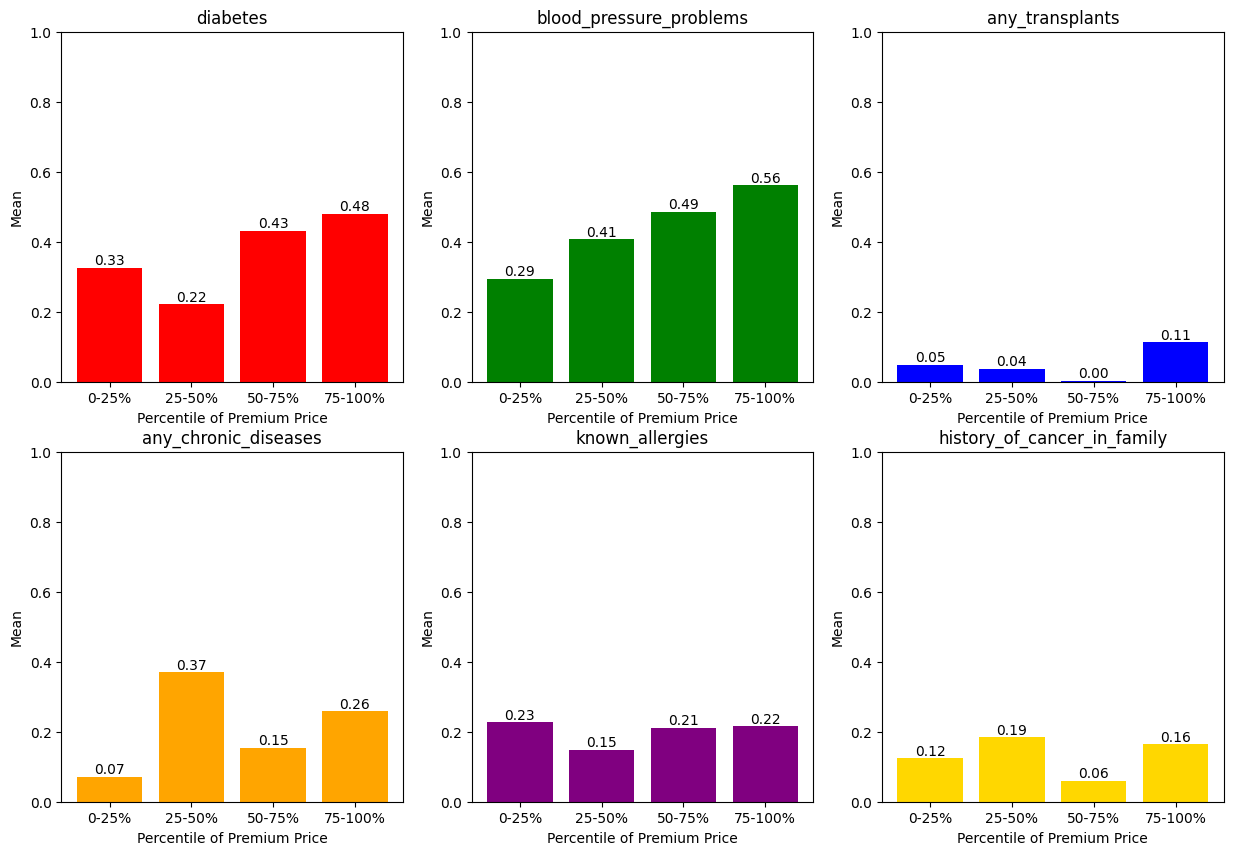

In [26]:
# Binning Premium Data Based on Quartiles
bins = [0, 21000, 23000, 28000, 100000]
labels = ['0-25%', '25-50%', '50-75%', '75-100%']
dat['premium_quartile'] = pd.cut(dat['premium_price'], bins=bins, labels=labels, right=False)

# Fitting Binary Variables into Premium Bins
binary_cols = ['premium_quartile', 'diabetes', 'blood_pressure_problems', 'any_transplants', 'any_chronic_diseases', 'known_allergies', 'history_of_cancer_in_family']
bar2 = dat[binary_cols].groupby('premium_quartile', observed=True).mean().reset_index()

fig, ax = plt.subplots(2,3)
fig.set_figwidth(15); fig.set_figheight(10)

# Supblot for 'diabetes'
ax[0,0].bar_label(ax[0,0].bar(bar2['premium_quartile'], bar2['diabetes'], color='red'),
                 fmt='%.2f')
ax[0,0].set_title('diabetes')
ax[0,0].set_ylabel('Mean')
ax[0,0].set_ylim(0,1)
ax[0,0].set_xlabel('Percentile of Premium Price')

# Supblot for 'blood_pressure_problems'
ax[0,1].bar_label(ax[0,1].bar(bar2['premium_quartile'], bar2['blood_pressure_problems'], color='green'),
                 fmt='%.2f')
ax[0,1].set_title('blood_pressure_problems')
ax[0,1].set_ylabel('Mean')
ax[0,1].set_ylim(0,1)
ax[0,1].set_xlabel('Percentile of Premium Price')

# Supblot for 'any_transplants'
ax[0,2].bar_label(ax[0,2].bar(bar2['premium_quartile'], bar2['any_transplants'], color='blue'),
                 fmt='%.2f')
ax[0,2].set_title('any_transplants')
ax[0,2].set_ylabel('Mean')
ax[0,2].set_ylim(0,1)
ax[0,2].set_xlabel('Percentile of Premium Price')

# Supblot for 'any_chronic_diseases'
ax[1,0].bar_label(ax[1,0].bar(bar2['premium_quartile'], bar2['any_chronic_diseases'], color='orange'),
                 fmt='%.2f')
ax[1,0].set_title('any_chronic_diseases')
ax[1,0].set_ylabel('Mean')
ax[1,0].set_ylim(0,1)
ax[1,0].set_xlabel('Percentile of Premium Price')

# Supblot for 'known_allergies'
ax[1,1].bar_label(ax[1,1].bar(bar2['premium_quartile'], bar2['known_allergies'], color='purple'),
                 fmt='%.2f')
ax[1,1].set_title('known_allergies')
ax[1,1].set_ylabel('Mean')
ax[1,1].set_ylim(0,1)
ax[1,1].set_xlabel('Percentile of Premium Price')

# Supblot for 'history_of_cancer_in_family'
ax[1,2].bar_label(ax[1,2].bar(bar2['premium_quartile'], bar2['history_of_cancer_in_family'], color='gold'),
                 fmt='%.2f')
ax[1,2].set_title('history_of_cancer_in_family')
ax[1,2].set_ylabel('Mean')
ax[1,2].set_ylim(0,1)
ax[1,2].set_xlabel('Percentile of Premium Price')

plt.show()

## 3. Predictive Modelling

In [7]:
dat = dat.drop(columns=['premium_quartile'])  # predictors
# minor data cleaning for predictive modelling

### 3.1 AutoML using Lazy Predict (No Hyper parameter tuning, No Feature Selection, No Cross Validation)

In [8]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Separate features and target
X = dat.drop(columns=['premium_price'])  # predictors
y = dat['premium_price']  # regression target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and run LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Show the results
print(models)


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 10
[LightGBM] [Info] Start training from score 24269.035533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

### 3.2 AutoML using PyCaret (includes Hyper parameter tuning, feature selection, cross validation)

In [9]:
# Step 1: Import PyCaret's regression module
from pycaret.regression import *

# Step 2: Setup the environment
regression_setup = setup(
    data=dat,
    target='premium_price',
    session_id=123,
    train_size=0.8,
    normalize=True,
    feature_selection=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.9,
    fold=5
)


# Step 3: Compare all models and pick the top performer
best_model = compare_models()

# Step 4: Tune the best model's hyperparameters
tuned_model = tune_model(best_model)

# Step 5: Evaluate performance with PyCaret's built-in visualizations
evaluate_model(tuned_model)

# Step 6: Finalize the model (for predictions)
final_model = finalize_model(tuned_model)

# Step 7: Make predictions on new/unseen data (e.g., test set)
predictions = predict_model(final_model)

# Step 8: Check the model's parameters
print(final_model.get_params())


,Description,Value
0,Session id,123
1,Target,premium_price
2,Target type,Regression
3,Original data shape,"(986, 11)"
4,Transformed data shape,"(986, 3)"
5,Transformed train set shape,"(788, 3)"
6,Transformed test set shape,"(198, 3)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2417.4964,14747164.5881,3819.1923,0.6165,0.1488,0.0963,0.2800
lightgbm,Light Gradient Boosting Machine,2449.9724,15065146.6950,3852.6211,0.6077,0.1513,0.0980,0.4280
catboost,CatBoost Regressor,2507.6925,16138788.8320,3997.6323,0.5787,0.1556,0.1005,1.0100
knn,K Neighbors Regressor,2500.6885,16393961.4609,4023.9751,0.5718,0.1592,0.1007,0.2500
rf,Random Forest Regressor,2471.1350,17093591.6113,4118.1015,0.5540,0.1613,0.0993,0.3240
ridge,Ridge Regression,3011.5493,18149743.4853,4234.5035,0.5281,0.1716,0.1274,0.2320
lasso,Lasso Regression,3011.3215,18149616.3380,4234.4398,0.5281,0.1716,0.1274,2.0620
lr,Linear Regression,3011.3020,18149569.8049,4234.4248,0.5281,0.1716,0.1273,3.6560
br,Bayesian Ridge,3011.7529,18150645.1168,4234.6578,0.5281,0.1717,0.1275,0.2440
llar,Lasso Least Angle Regression,3011.3215,18149616.3381,4234.4398,0.5281,0.1716,0.1274,0.2280


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2891.1004,17056171.4316,4129.9118,0.5579,0.1618,0.1182
1,3041.0526,19799230.0816,4449.6326,0.5265,0.1745,0.1254
2,2550.9875,11265150.3733,3356.3597,0.7047,0.1425,0.1164
3,2764.4187,13972327.8254,3737.9577,0.6100,0.1621,0.1290
4,2810.1189,16414936.2342,4051.5350,0.5546,0.1610,0.1150
Mean,2811.5356,15701563.1892,3945.0794,0.5907,0.1604,0.1208
Std,160.6959,2891599.9782,371.3651,0.0630,0.0102,0.0054


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2581.0089,16684114.9148,4084.6193,0.5846,0.1508,0.0978


{'memory': Memory(location=None), 'steps': [('numerical_imputer', TransformerWrapper(include=['age', 'diabetes', 'height', 'weight',
                            'blood_pressure_problems', 'any_transplants',
                            'any_chronic_diseases', 'known_allergies',
                            'history_of_cancer_in_family',
                            'number_of_major_surgeries'],
                   transformer=SimpleImputer())), ('categorical_imputer', TransformerWrapper(include=[],
                   transformer=SimpleImputer(strategy='most_frequent'))), ('remove_multicollinearity', TransformerWrapper(exclude=[],
                   transformer=RemoveMulticollinearity(threshold=0.9))), ('normalize', TransformerWrapper(transformer=StandardScaler())), ('feature_selection', TransformerWrapper(exclude=[],
                   transformer=SelectFromModel(estimator=LGBMRegressor(),
                                               max_features=2, threshold=-inf))), ('actual_estimator'

### 3.3 Top Models as per AutoML

### Top 3 Models from LazyPredict
1. HistGradientBoostingRegressor  
2. LGBMRegressor  
3. RandomForestRegressor

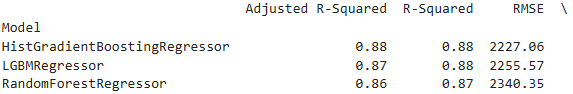

### Top 3 Models from PyCaret
1. Gradient Boosting Regressor  
2. LGBMRegressor  
3. CatBoost Regressor

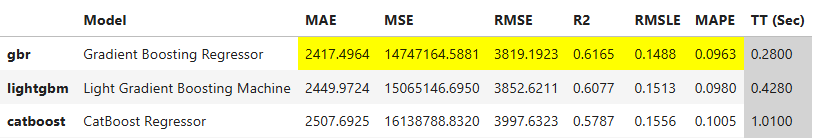

### Model Comparison Approach followed

To ensure a fair comparison, all selected models above were re-trained and re-evaluated.

**Evaluation Metrics:**
- Cross Validation RMSE (Root Mean Squared Error) – lower is better    
- Cross Validation Adjusted R² – accounts for model complexity - higher is better

**Note:**  
R² values from PyCaret were observed to be lower than those from LazyPredict.  
This is expected, as PyCaret performs feature selection, hyperparameter tuning and cross validation, which improve generalization but may reduce apparent performance compared to LazyPredict, which uses default model settings without tuning.


In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

# Define adjusted R² function
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Define RMSE scorer for CV
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

results = {}

# Model grid with basic parameter search space
model_grid = {
    'GradientBoosting': (
        GradientBoostingRegressor(random_state=42),
        {'model__n_estimators': [100, 200], 'model__learning_rate': [0.1, 0.05]}
    ),
    'LGBM': (
        LGBMRegressor(random_state=42),
        {'model__n_estimators': [100, 200], 'model__learning_rate': [0.1, 0.05]}
    ),
    'CatBoost': (
        CatBoostRegressor(verbose=0, random_state=42),
        {'model__depth': [4, 6], 'model__learning_rate': [0.1, 0.05]}
    ),
    'HistGradientBoosting': (
        HistGradientBoostingRegressor(random_state=42),
        {'model__max_iter': [100, 200], 'model__learning_rate': [0.1, 0.05]}
    ),
    'RandomForest': (
        RandomForestRegressor(random_state=42),
        {'model__n_estimators': [100, 200], 'model__max_depth': [None, 10]}
    )
}

# Loop through all models
for name, (model, param_grid) in model_grid.items():
    print(f"Training {name}...")

    pipeline = Pipeline([
        ('feature_selection', SelectKBest(score_func=f_regression, k=5)),
        ('model', model)
    ])

    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    n = X_test.shape[0]
    k = X_test.shape[1]

    # Hold-out test metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2_score(r2, n, k)

    # Cross-validation scores
    cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
    cv_r2 = np.mean(cv_r2_scores)
    cv_adj_r2 = adjusted_r2_score(cv_r2, X_train.shape[0], k)

    cv_rmse_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring=rmse_scorer)
    cv_rmse = -np.mean(cv_rmse_scores)

    results[name] = {
        'Best Params': grid.best_params_,
        'RMSE': rmse,
        'R²': r2,
        'Adjusted R²': adj_r2,
        'CV RMSE': cv_rmse,
        'CV R²': cv_r2,
        'CV Adjusted R²': cv_adj_r2
    }

# Display results in tabular format
results_df = pd.DataFrame(results).T
results_df = results_df[['RMSE', 'R²', 'Adjusted R²', 'CV RMSE', 'CV R²', 'CV Adjusted R²', 'Best Params']]
print("\nModel Performance Comparison with Feature Selection & Tuning:")
print(results_df.round(3))


Training GradientBoosting...
Training LGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 5
[LightGBM] [Info] Start training from score 24269.035533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [11]:
import pandas as pd

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T  # Transpose for model names as rows
results_df = results_df.reset_index().rename(columns={'index': 'Model'})

# Round numeric columns for display
numeric_cols = ['RMSE', 'R²', 'Adjusted R²', 'CV R²', 'CV Adjusted R²']
results_df[numeric_cols] = results_df[numeric_cols].round(3)

# Display the table
print("\nModel Performance Summary:")
print(results_df.to_string(index=False))



Model Performance Summary:
               Model                                                Best Params    RMSE   R² Adjusted R² CV RMSE CV R² CV Adjusted R²
    GradientBoosting {'model__learning_rate': 0.05, 'model__n_estimators': 100} 2832.32 0.81        0.80 3427.15  0.69           0.68
                LGBM {'model__learning_rate': 0.05, 'model__n_estimators': 100} 2784.71 0.82        0.81 3555.40  0.66           0.66
            CatBoost          {'model__depth': 4, 'model__learning_rate': 0.05} 2891.82 0.80        0.79 3714.07  0.63           0.63
HistGradientBoosting     {'model__learning_rate': 0.05, 'model__max_iter': 100} 2784.72 0.82        0.81 3556.03  0.66           0.66
        RandomForest       {'model__max_depth': 10, 'model__n_estimators': 100} 3003.53 0.79        0.78 3804.69  0.61           0.61


### 3.4 Compare Top Machine Learning Models

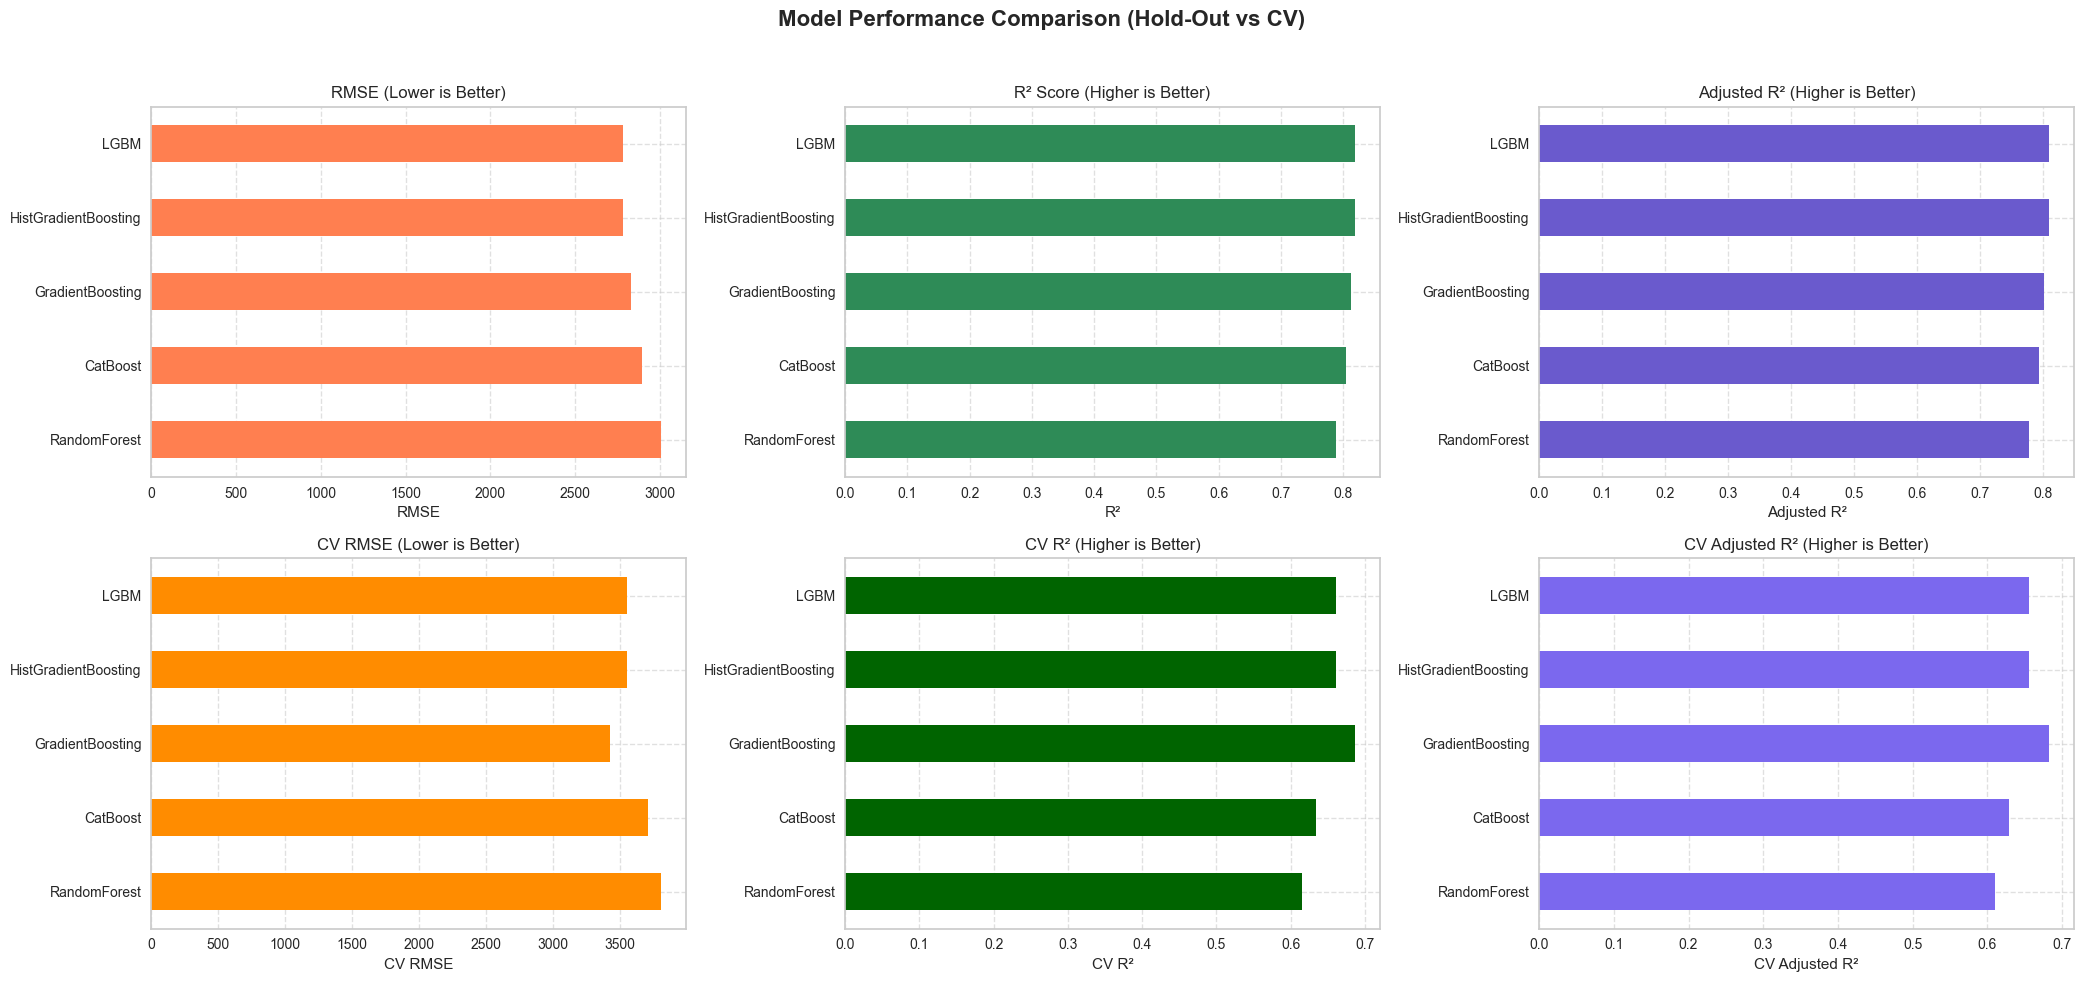

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert results to DataFrame and sort by R²
results_df = pd.DataFrame(results).T.sort_values(by='R²', ascending=False)

# Set up figure with 6 subplots
fig, ax = plt.subplots(2, 3, figsize=(21, 10))

# RMSE plot
results_df['RMSE'].plot(kind='barh', ax=ax[0, 0], color='coral')
ax[0, 0].set_title('RMSE (Lower is Better)')
ax[0, 0].set_xlabel('RMSE')
ax[0, 0].invert_yaxis()
ax[0, 0].grid(True, linestyle='--', alpha=0.6)

# R² plot
results_df['R²'].plot(kind='barh', ax=ax[0, 1], color='seagreen')
ax[0, 1].set_title('R² Score (Higher is Better)')
ax[0, 1].set_xlabel('R²')
ax[0, 1].invert_yaxis()
ax[0, 1].grid(True, linestyle='--', alpha=0.6)

# Adjusted R² plot
results_df['Adjusted R²'].plot(kind='barh', ax=ax[0, 2], color='slateblue')
ax[0, 2].set_title('Adjusted R² (Higher is Better)')
ax[0, 2].set_xlabel('Adjusted R²')
ax[0, 2].invert_yaxis()
ax[0, 2].grid(True, linestyle='--', alpha=0.6)

# CV RMSE plot
results_df['CV RMSE'].plot(kind='barh', ax=ax[1, 0], color='darkorange')
ax[1, 0].set_title('CV RMSE (Lower is Better)')
ax[1, 0].set_xlabel('CV RMSE')
ax[1, 0].invert_yaxis()
ax[1, 0].grid(True, linestyle='--', alpha=0.6)

# CV R² plot
results_df['CV R²'].plot(kind='barh', ax=ax[1, 1], color='darkgreen')
ax[1, 1].set_title('CV R² (Higher is Better)')
ax[1, 1].set_xlabel('CV R²')
ax[1, 1].invert_yaxis()
ax[1, 1].grid(True, linestyle='--', alpha=0.6)

# CV Adjusted R² plot
results_df['CV Adjusted R²'].plot(kind='barh', ax=ax[1, 2], color='mediumslateblue')
ax[1, 2].set_title('CV Adjusted R² (Higher is Better)')
ax[1, 2].set_xlabel('CV Adjusted R²')
ax[1, 2].invert_yaxis()
ax[1, 2].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Model Performance Comparison (Hold-Out vs CV)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 3.5 Best Model

asets.


### Why We Selected `HistGradientBoostingRegressor` as the Champion Model

- It achieved the **third-lowest Cross-Validated RMSE**, indicating strong predictive performance, only slightly behind the top two models.
- It also secured the **third-highest Cross-Validated Adjusted R²**, demonstrating a good balance between accuracy and model complexity.
- We preferred it over `GradientBoostingRegressor` because:
  - `HistGradientBoostingRegressor` is **faster and more efficient**, especially on large datasets, which is important for this use case.
- We selected it over `LGBMRegressor` because:
  - `LGBMRegressor` can be **more prone to overfitting**


### 3.6 Tradeoffs Made while selecting the Best Model

### Summary Tradeoff Table:

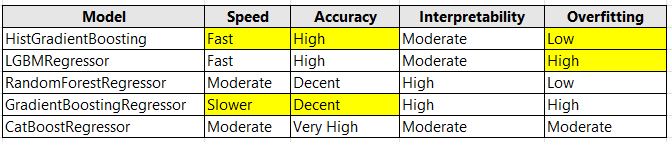


### 3.7 SHAP Plot for Best Model

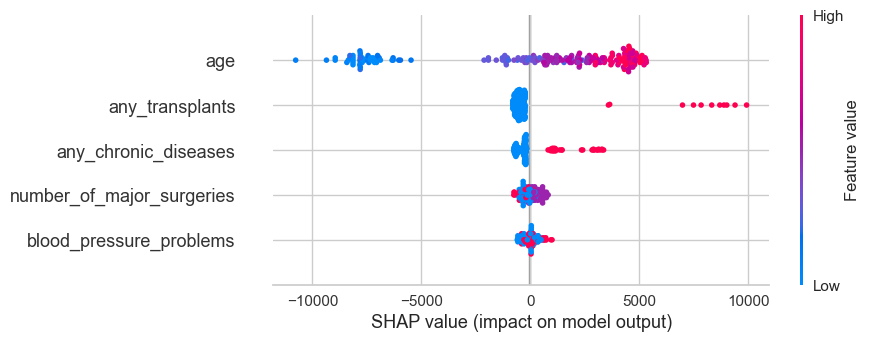

In [13]:
import shap
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import HistGradientBoostingRegressor

# Step 1: Feature Selection with names preserved
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]

# Transform train/test sets using selected columns only
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 2: Re-train model with selected features
best_model = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.05, random_state=42)
best_model.fit(X_train_selected, y_train)

# Step 3: SHAP Explanation
explainer = shap.Explainer(best_model, X_train_selected)
shap_values = explainer(X_test_selected)

# Step 4: SHAP Beeswarm Plot with actual feature names
shap.plots.beeswarm(shap_values, max_display=10)


### SHAP Analysis Commentary – Insurance Premium Prediction - HistGradientBoosting

This SHAP summary plot explains the impact of each feature on insurance premium predictions:

#### 1. `age`
- Higher `age` values (pink dots on far right side of vertical 0 line) significantly increase predicted premiums.
- Lower `age` values (blue dots on the far left side of vertical 0 line) decrease premiums.
- Clear positive correlation: **older individuals → higher insurance costs**.

#### 2. `any_transplants`
- Having undergone a transplant leads to a strong increase in predicted premiums (pink dots on far right).
- Those without (blue values - low feature value were not on extremes) have minimal or even negative influence on premiums.

#### 3. `any_chronic_diseases`
- Individuals with chronic conditions (pink dots on right side of vertical 0 line) show increase in premiums.
- Those without (blue values - low feature value were not on extremes) have minimal or even negative influence on premiums.

#### 4. `number_of_major_surgeries`
- More major surgeries tend to increase premiums slightly, but the effect is less consistent since low (blue) and high values (pink) overlap around 0

#### 5. `blood_pressure_problems`
- Least influential among the top 5 features.
- High blood pressure (small pink - High Value dots on little right of vertical 0 lines) contributes marginally to higher premiums. The blue and pink dots overlapping around 0 indicate little to no effect on prediction 



### 3.8 Scatter Plot of actual Vs predicted premium

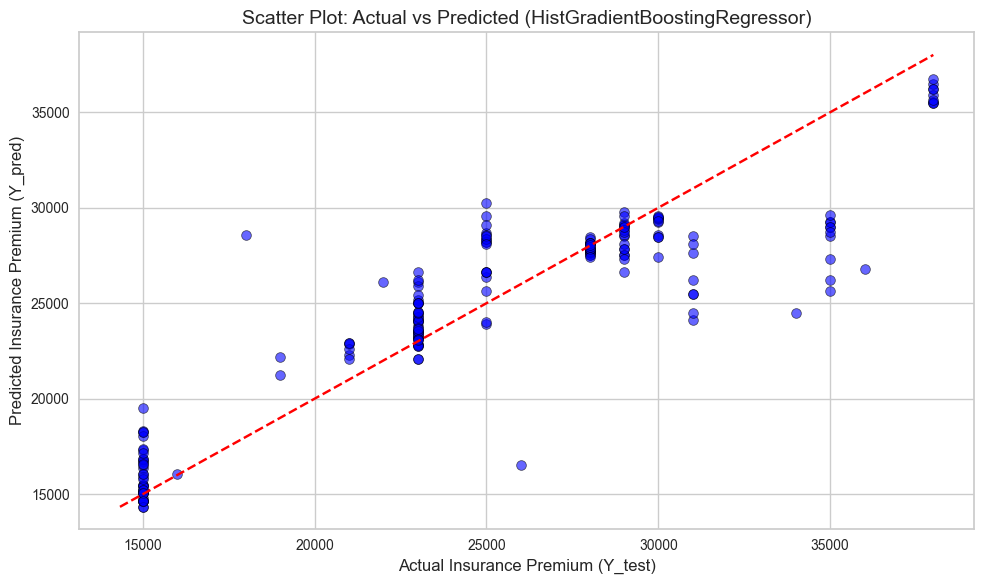

In [14]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import HistGradientBoostingRegressor

# Step 1: Feature Selection
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]

# Transform train/test sets using selected columns
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 2: Fit HistGradientBoostingRegressor
best_model = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.05, random_state=42)
best_model.fit(X_train_selected, y_train)

# Step 3: Predict on test set
y_pred = best_model.predict(X_test_selected)

# Step 4: Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor='black', alpha=0.6)

# Ideal line (perfect prediction)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title('Scatter Plot: Actual vs Predicted (HistGradientBoostingRegressor)', fontsize=14)
plt.xlabel('Actual Insurance Premium (Y_test)', fontsize=12)
plt.ylabel('Predicted Insurance Premium (Y_pred)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


#### The Actual and Predicted value scatter points fall along the 45 degree line which reflects good predictability